# Visualises results from running the CCI on the simulated data.

INPUT:
 * data/sim_data/spatialsim_v2.h5ad
 * data/sim_data/methods_out/*_ints.txt

OUTPUT:
 * plots/X6_sim_spatial/*
 
## Environment Setup

In [32]:
# TODO update work_dir
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stLearn/'

import os
os.chdir(work_dir)

import pandas as pd
import scanpy as sc
import matplotlib

import scripts.utils.visualisation.helpers as vhs
import scripts.X6_breast_cancer_simulation.helpers as chs

data_dir = 'data/sim_data/'
data_dir2 = 'data/sim_data/methods_out/'
out_plots = 'plots/X6_sim_spatial/'


## Loading the data

In [ ]:
data = sc.read_h5ad(data_dir+'spatialsim_LRCCI.h5ad')

In [28]:
print(data.obs['cell_type'].cat.categories)
data.uns['cell_type_colors'] = ['#246AA9', '#00FA9A', '#E37C1A',
								'#AD8ABE', '#94431E']

Index(['Bcell', 'Tcell', 'luminal_ar', 'mesenchymal', 'stroma'], dtype='object')


In [50]:
print(data.obs['hood_type'].cat.categories)
data.uns['hood_type_colors'] = ['#635790', 'lightskyblue', 'linen'#'#B5B5B5'
                               ]

Index(['cancer', 'immune', 'stroma'], dtype='object')


In [52]:
cts = list(data.obs['cell_type'].cat.categories)
ct_cmaps = []
for i, ct in enumerate(cts):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                        ["whitesmoke",#"#440254",
                         data.uns['cell_type_colors'][i]])
    ct_cmaps.append( cmap )

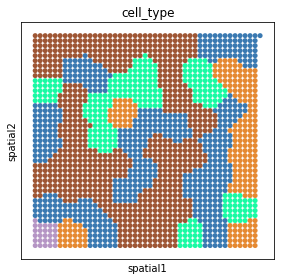

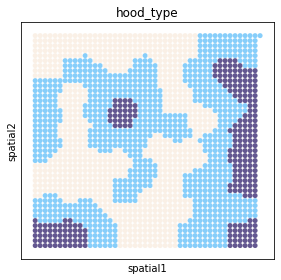

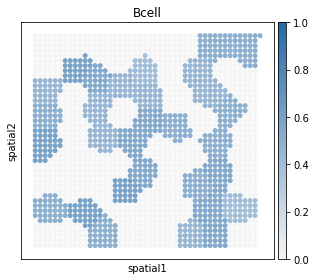

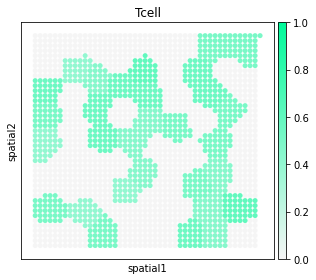

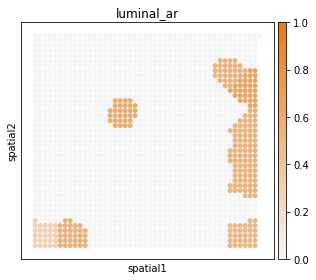

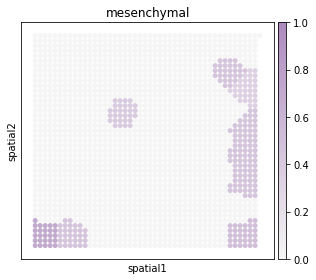

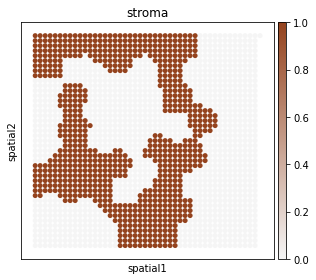

In [62]:
#### Making the spatial plot #####
s=1
sc.pl.spatial(data, color='cell_type', show=False, alpha=.9, size=s, legend_loc=None,)
vhs.dealWithPlot(True, True, True, out_plots,
                 'sim_data_spatial.pdf', 300)

sc.pl.spatial(data, color='hood_type', show=False, size=s, legend_loc=None,)
vhs.dealWithPlot(True, True, True, out_plots,
                 'sim_data_spatial_hoodtype.pdf', 300)

for i, ct in enumerate(cts):
    sc.pl.spatial(data, color=ct, show=False, cmap=ct_cmaps[i],
                 vmax=1, size=s)
    vhs.dealWithPlot(True, True, True, out_plots,
                     f'sim_data_spatial_{ct}.pdf', 300)

In [63]:
#### Getting results from other methods #####
st_df = data.uns['lr_cci_cell_type']
cc_df = pd.read_csv(data_dir2+'cell_chat_ints.txt', sep='\t')
scsr_df = pd.read_csv(data_dir2+'singlecellsignalr_ints.txt', sep='\t')
natmi_df = pd.read_csv(data_dir2+'natmi_ints.txt', sep='\t', index_col=0)
squidpy_df = pd.read_csv(data_dir2+'squidpy_ints.txt', sep='\t', index_col=0)
cpdb_df = pd.read_csv(data_dir2+'cellphonedb_ints.txt', sep='\t', index_col=0)

methods = ['stLearn', 'CellChat', 'SingleCellSignalR', 'NATMI', 'squidpy',
           'CellPhoneDB']
int_dfs = [st_df, cc_df, scsr_df, natmi_df, squidpy_df, cpdb_df]

## Visualising the results

[]
['Bcell' 'Tcell' 'luminal_ar' 'mesenchymal' 'stroma']


/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


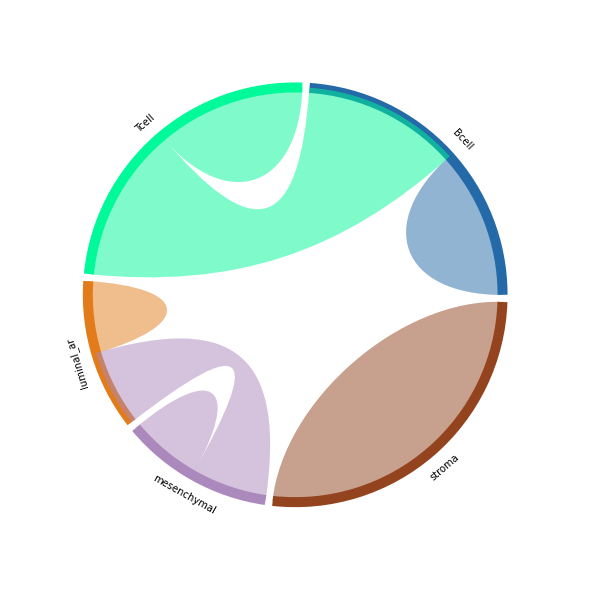

[]
['Bcell' 'Tcell' 'luminal_ar' 'mesenchymal' 'stroma']


/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


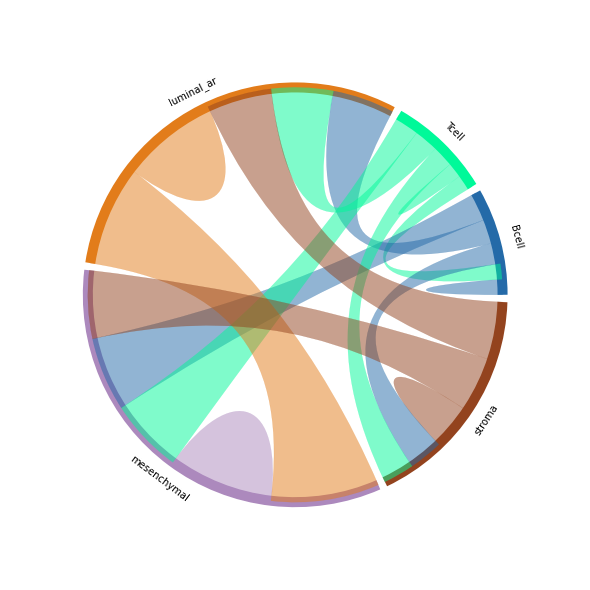

[]
['Bcell' 'Tcell' 'luminal_ar' 'mesenchymal' 'stroma']


/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


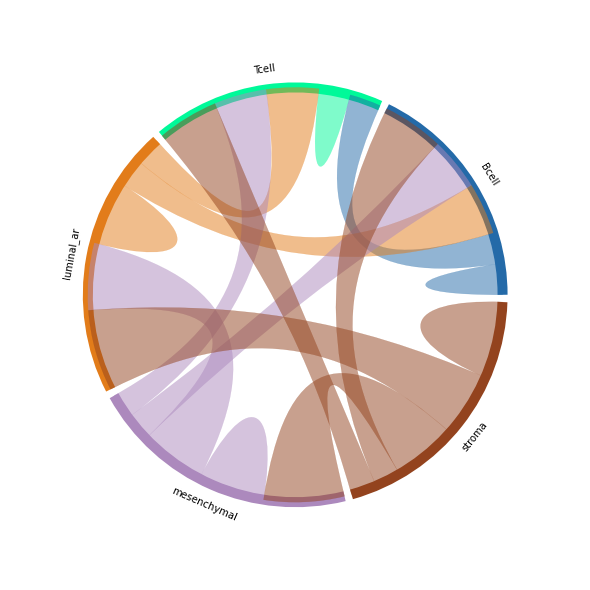

[]
['Bcell' 'Tcell' 'luminal_ar' 'mesenchymal' 'stroma']


/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


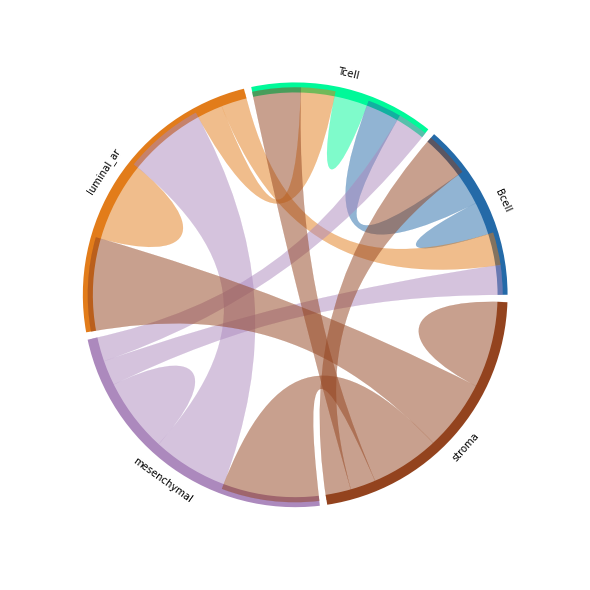

[]
['Bcell' 'Tcell' 'luminal_ar' 'mesenchymal' 'stroma']


/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


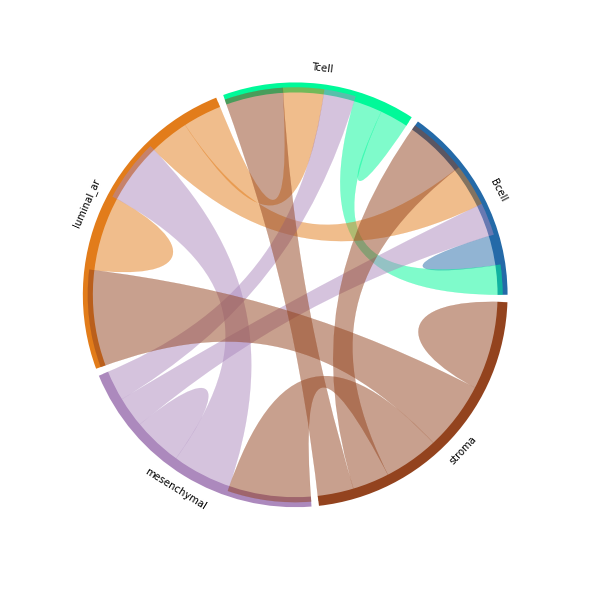

[]
['Bcell' 'Tcell' 'luminal_ar' 'mesenchymal' 'stroma']


/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


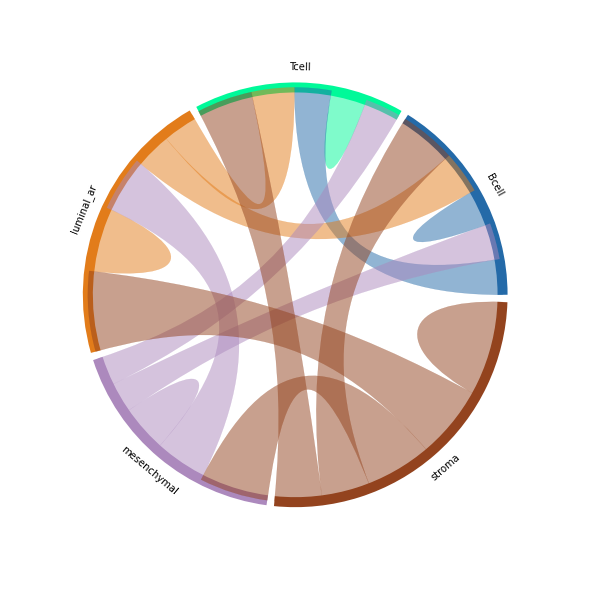

In [64]:
# chs.chord_plot(int_dfs[0], data, 'cell_type', min_ints=3,
#                n_top_ccis=11, show=False)
# vhs.dealWithPlot(True, True, True, out_plots,
#                  f'{methods[0]}_chordplot.pdf', 300)

for i, int_df in enumerate(int_dfs):
    chs.chord_plot(int_df, data, 'cell_type', min_ints=3,
                   n_top_ccis=11, show=False)
    vhs.dealWithPlot(True, True, True, out_plots,
                     f'{methods[i]}_chordplot.pdf', 300)